In [1]:
import base64
import os
from io import BytesIO
from pathlib import Path

import requests
from IPython.display import HTML, Markdown, display
from IPython.display import Image as IPythonImage
from PIL import Image, ImageOps


def encode_image_with_padding(image_path: str, padding: int = 40) -> str:
    """将本地图片转为 base64 字符串"""
    # 给图片增加40像素的白色padding and convert to base64
    img = Image.open(image_path)
    img = img.convert("RGB")
    img = ImageOps.expand(img, border=padding, fill="white")
    img_byte_arr = BytesIO()
    img.save(img_byte_arr, format="PNG")
    return base64.b64encode(img_byte_arr.getvalue()).decode("utf-8")


def encode_image(image_path: str) -> str:
    """将本地图片转为 base64 字符串"""

    with open(image_path, "rb") as f:
        return base64.b64encode(f.read()).decode("utf-8")


# UniParser-1.0.0

In [2]:
UNIPARSER_PRIVATE_IP = os.getenv('UNIPARSER_PRIVATE_IP')
UniParser_HOST = f"http://{UNIPARSER_PRIVATE_IP}"

## 表格识别

In [3]:
image_path = "./snip/60c75518bdbb8914d5a3a787_008_5.png"
image_path = Path(image_path)
img_b64_str = encode_image(image_path)

r = requests.post(f'{UniParser_HOST}:18570/rec-table', json={'images': [img_b64_str]})
print(r.json())

{'code': 0, 'data': [{'bboxes': [{'x1': 5.0, 'x2': 1045.0, 'y1': 6.0, 'y2': 93.0}, {'x1': 289.0, 'x2': 669.0, 'y1': 4.0, 'y2': 107.0}, {'x1': 486.0, 'x2': 754.0, 'y1': 10.0, 'y2': 96.0}, {'x1': 644.0, 'x2': 988.0, 'y1': 15.0, 'y2': 93.0}, {'x1': 833.0, 'x2': 1313.0, 'y1': 8.0, 'y2': 118.0}, {'x1': 1245.0, 'x2': 1562.0, 'y1': 12.0, 'y2': 100.0}, {'x1': 1498.0, 'x2': 1805.0, 'y1': 13.0, 'y2': 99.0}, {'x1': 1761.0, 'x2': 2019.0, 'y1': 2.0, 'y2': 125.0}, {'x1': 2.0, 'x2': 274.0, 'y1': 90.0, 'y2': 171.0}, {'x1': 268.0, 'x2': 470.0, 'y1': 92.0, 'y2': 168.0}, {'x1': 450.0, 'x2': 616.0, 'y1': 92.0, 'y2': 167.0}, {'x1': 626.0, 'x2': 860.0, 'y1': 93.0, 'y2': 168.0}, {'x1': 835.0, 'x2': 1223.0, 'y1': 93.0, 'y2': 169.0}, {'x1': 1206.0, 'x2': 1496.0, 'y1': 93.0, 'y2': 170.0}, {'x1': 1496.0, 'x2': 1774.0, 'y1': 93.0, 'y2': 172.0}, {'x1': 1780.0, 'x2': 2019.0, 'y1': 90.0, 'y2': 173.0}, {'x1': 1.0, 'x2': 262.0, 'y1': 166.0, 'y2': 247.0}, {'x1': 271.0, 'x2': 470.0, 'y1': 167.0, 'y2': 241.0}, {'x1': 451

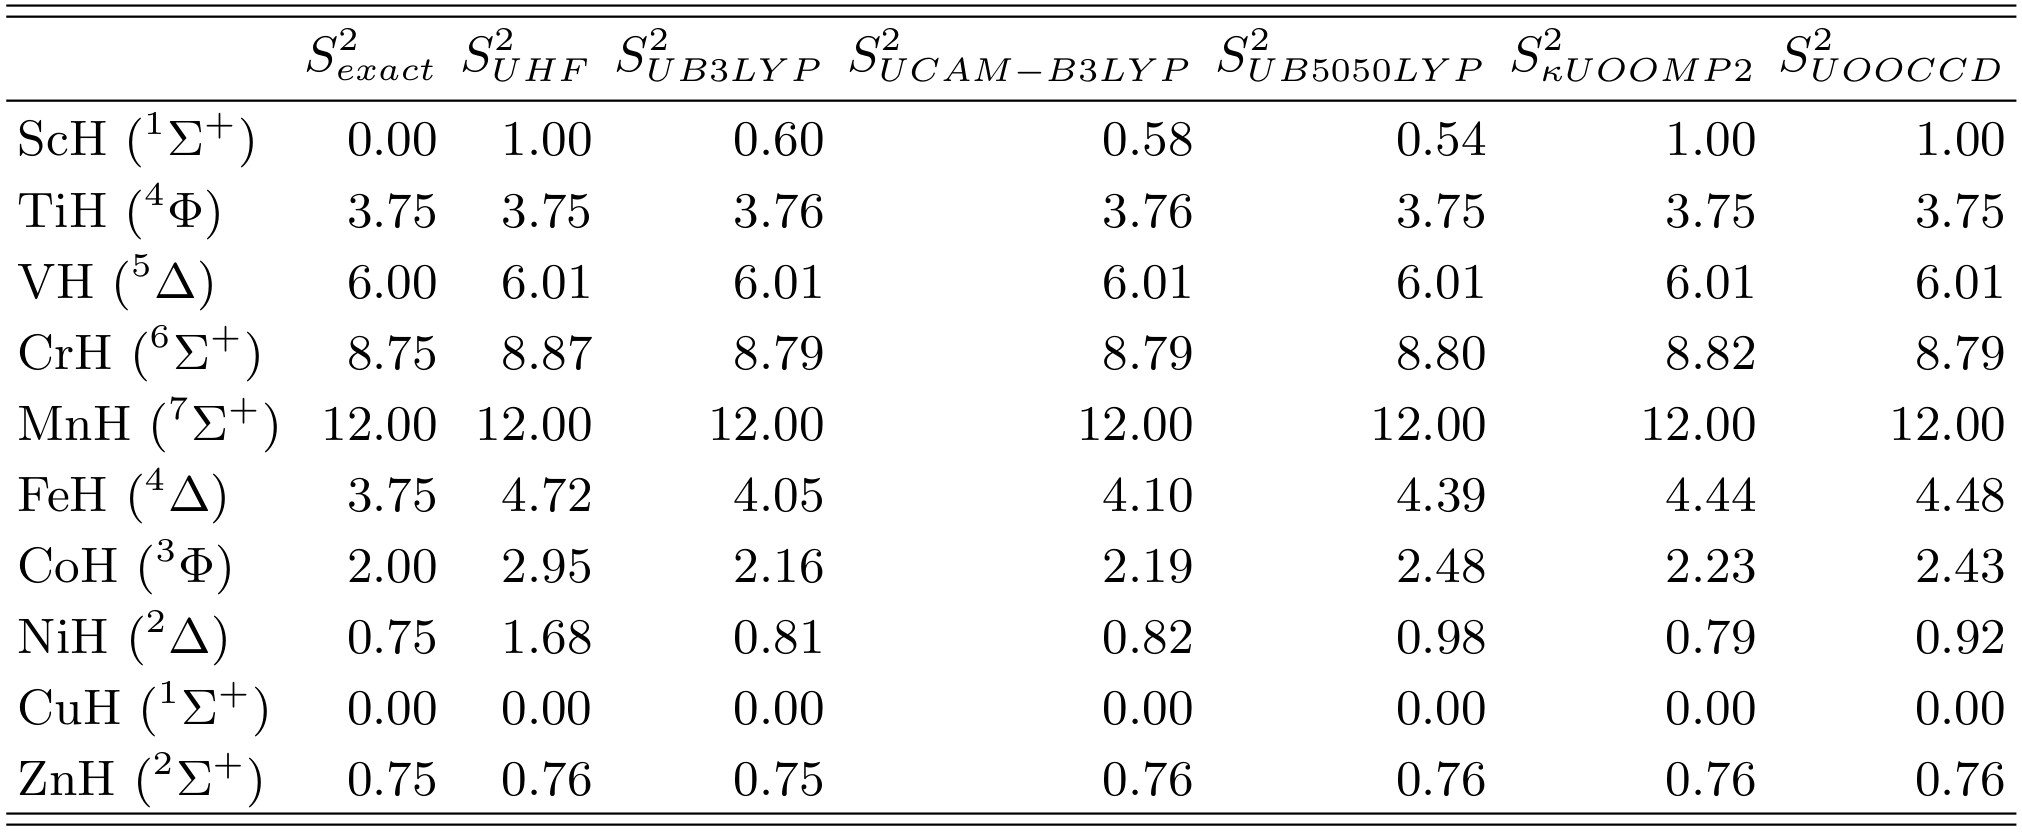

In [4]:
IPythonImage(filename=image_path, width=800)

In [5]:
r.json()["data"][0]['html']

'<table><tr><td></td><td>rec-0 rec-1 rec-8</td><td>rec-2</td><td>rec-7</td><td>rec-3 rec-5</td><td>rec-9</td><td>rec-6 rec-10</td><td>rec-4</td></tr><tr><td>rec-12 rec-11</td><td>rec-13</td><td>rec-14</td><td>rec-15</td><td>rec-16</td><td>rec-17</td><td>rec-18</td><td>rec-19</td></tr><tr><td>rec-20 rec-21</td><td>rec-22</td><td>rec-23</td><td>rec-24</td><td>rec-25</td><td>rec-26</td><td>rec-27</td><td>rec-28</td></tr><tr><td>rec-30 rec-29</td><td>rec-31</td><td>rec-32</td><td>rec-33</td><td>rec-34</td><td>rec-35</td><td>rec-36</td><td>rec-37</td></tr><tr><td>rec-39 rec-38</td><td>rec-40</td><td>rec-41</td><td>rec-42</td><td>rec-43</td><td>rec-44</td><td>rec-45</td><td>rec-46</td></tr><tr><td>rec-48 rec-47</td><td>rec-49</td><td>rec-50</td><td>rec-51</td><td>rec-52</td><td>rec-53</td><td>rec-54</td><td>rec-55</td></tr><tr><td>rec-57 rec-56</td><td>rec-58</td><td>rec-59</td><td>rec-60</td><td>rec-61</td><td>rec-62</td><td>rec-63</td><td>rec-64</td></tr><tr><td>rec-66 rec-65</td><td>rec-6

In [6]:
display(HTML(r.json()["data"][0]['html']))

,rec-0 rec-1 rec-8,rec-2,rec-7,rec-3 rec-5,rec-9,rec-6 rec-10,rec-4
rec-12 rec-11,rec-13,rec-14,rec-15,rec-16,rec-17,rec-18,rec-19
rec-20 rec-21,rec-22,rec-23,rec-24,rec-25,rec-26,rec-27,rec-28
rec-30 rec-29,rec-31,rec-32,rec-33,rec-34,rec-35,rec-36,rec-37
rec-39 rec-38,rec-40,rec-41,rec-42,rec-43,rec-44,rec-45,rec-46
rec-48 rec-47,rec-49,rec-50,rec-51,rec-52,rec-53,rec-54,rec-55
rec-57 rec-56,rec-58,rec-59,rec-60,rec-61,rec-62,rec-63,rec-64
rec-66 rec-65,rec-67,rec-68,rec-69,rec-70,rec-71,rec-72,rec-73
rec-75 rec-74,rec-76,rec-77,rec-78,rec-79,rec-80,rec-81,rec-82
rec-84 rec-83,rec-85,rec-86,rec-87,rec-88,rec-89,rec-90,rec-91
rec-93 rec-92,rec-94,rec-95,rec-96,rec-97,rec-98,rec-99,rec-100


## 文本识别

In [7]:
image_path = "./snip/60c75518bdbb8914d5a3a787_010_8.png"
image_path = Path(image_path)
img_b64_str = encode_image(image_path)

r = requests.post(f'{UniParser_HOST}:50010/rec-text', json={'images': [img_b64_str], "lang": "en"})
print(r.json())

{'code': 0, 'data': [{'bboxes': [[48, 0, 1367, 69], [-3, 69, 1364, 123], [-3, 133, 1366, 187], [-3, 193, 1365, 256], [-3, 258, 1367, 318], [-3, 326, 1366, 382], [-3, 387, 1367, 442], [-3, 451, 1367, 507], [-3, 515, 1369, 572], [-3, 573, 1371, 642], [-3, 638, 1362, 704], [-3, 707, 1366, 762], [-3, 767, 1360, 829], [-3, 829, 1363, 893], [-3, 891, 1371, 960], [-3, 964, 1366, 1016], [-3, 1022, 1367, 1080], [-3, 1083, 1369, 1153], [-3, 1151, 1360, 1211], [-3, 1212, 1367, 1272], [-3, 1278, 1366, 1340], [-3, 1342, 1366, 1400], [-3, 1405, 1367, 1465], [-1, 1474, 1367, 1525], [-3, 1525, 1363, 1598], [-3, 1596, 1369, 1656], [-3, 1656, 1369, 1718], [-3, 1723, 1364, 1781], [-3, 1787, 1367, 1847], [-3, 1852, 1366, 1909]], 'confs': [0.9700400233268738, 0.9820594787597656, 0.9775648713111877, 0.9920864701271057, 0.9714311957359314, 0.9859472513198853, 0.9837521910667419, 0.9660004377365112, 0.987454891204834, 0.9648963809013367, 0.992371678352356, 0.9742422103881836, 0.987845242023468, 0.976888060569

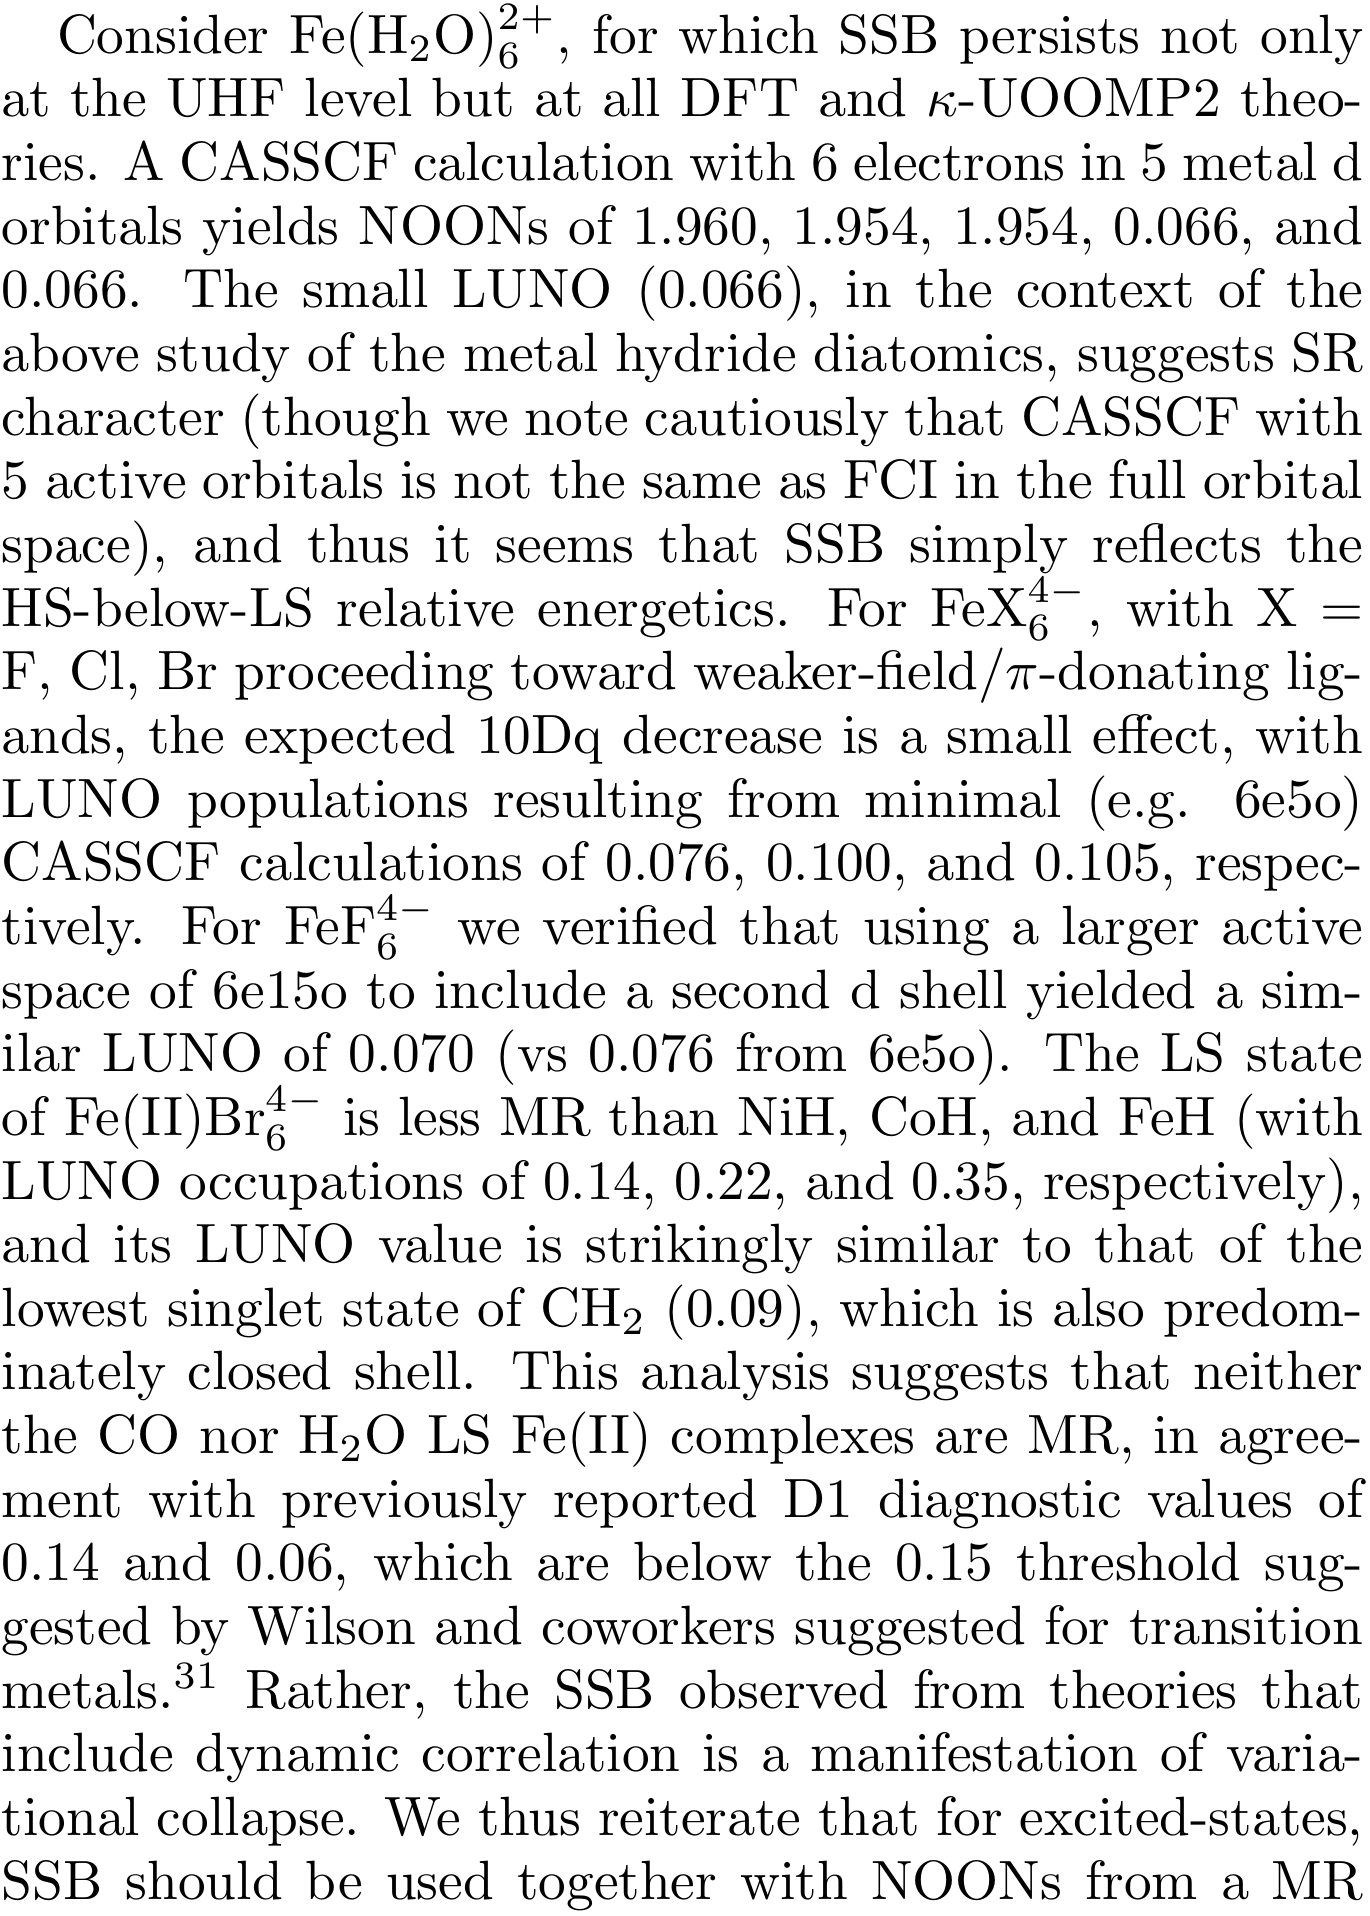

In [8]:
IPythonImage(filename=image_path, width=500)

In [9]:
display(Markdown(r.json()["data"][0]['full']))

 Consider Fe(H2O)2+, for which SSB persists not only at the UHF level but at all DFT and κ-UOOMP2 theo- ries. A CASSCF calculation with 6 electrons in 5 metal d orbitals yields NOONs of 1.960, 1.954, 1.954, 0.066, and 0.066. The small LUNO (O.066), in the context of the above study of the metal hydride diatomics, suggests SR character (though we note cautiously that CASSCF with 5 active orbitals is not the same as FCI in the full orbital space), and thus it seems that SSB simply relects the HS-below-LS relative energetics. For FeX6, with X = F, Cl, Br proceeding toward weaker-field/π-donating lig- ands, the expected 1oDq decrease is a small effect, with LUNO populations resulting from minimal (e.g. 6e5o) CASSCF calculations of 0.076, 0.100, and 0.105, respec- tively. For FeF6– we verified that using a larger active space of 6e15o to include a second d shell yielded a sim- ilar LUNO of 0.070 (vs 0.076 from 6e5o). The LS state of Fe(I)Br6– is less MR than NiH, CoH, and FeH (with LUNO occupations of 0.14, 0.22, and 0.35, respectively), and its LUNO value is strikingly similar to that of the lowest singlet state of CH2 (O.09), which is also predom- inately closed shell. This analysis suggests that neither the CO nor H2O LS Fe(II) complexes are MR, in agree- ment with previously reported D1 diagnostic values of 0.14 and 0.06, which are below the 0.15 threshold sug- gested by Wilson and coworkers suggested for transition metals.31 Rather, the SSB observed from theories that include dynamic correlation is a manifestation of varia- tional collapse. We thus reiterate that for excited-states, SSB should be used together with NOONs from a MR

## 公式识别

In [10]:
image_path = "./snip/802.1778_018_25.png"
image_path = Path(image_path)
img_b64_str = encode_image(image_path)

r = requests.post(f'{UniParser_HOST}:10112/rec-equation', json={'images': [img_b64_str]})
print(r.json())

{'code': 0, 'data': [{'full': 'P_{g}(t)=\\frac{R_{L}a_{0}^{2}|G(j\\omega)|^{2}}{(R+R_{L})^{2}}\\sin^{2}(\\omega t-\\angle G(j\\omega))'}], 'format': 'latex', 'time_dict': {'model_time': 0.519058283418417}, 'type': 'equation', 'usage': {}}


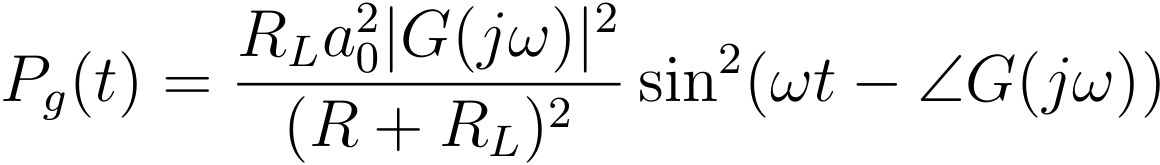

In [11]:
IPythonImage(filename=image_path, width=500)

In [12]:
display(Markdown("$$" + r.json()["data"][0]['full'] + "$$"))

$$P_{g}(t)=\frac{R_{L}a_{0}^{2}|G(j\omega)|^{2}}{(R+R_{L})^{2}}\sin^{2}(\omega t-\angle G(j\omega))$$

## 图表识别

In [13]:
image_path = "./snip/63e096721f23f0032d42225a_010_2.png"
image_path = Path(image_path)
img_b64_str = encode_image(image_path)

r = requests.post(f'{UniParser_HOST}:10103/rec-chart', json={'images': [img_b64_str]})
print(r.json())

{'code': 0, 'data': [{'full': 'TITLE |  \n Pt loading (µg⋅ cm⋅) | ECSA (cm⋅, mg⋅) | Specific Activity (µA cm⋅) | Mass Activity (A 9pt) \n 3.2 | 368 | 308 | 114 \n 4.5 | 515 | 450 | 235 \n 5.8 | 575 | 600 | 345 \n 8.4 | 455 | 541 | 245 \n 10.9 | 354 | 522 | 184 \n 13.5 | 293 | 511 | 150'}], 'format': 'text', 'time_dict': {}, 'type': 'chart', 'usage': {}}


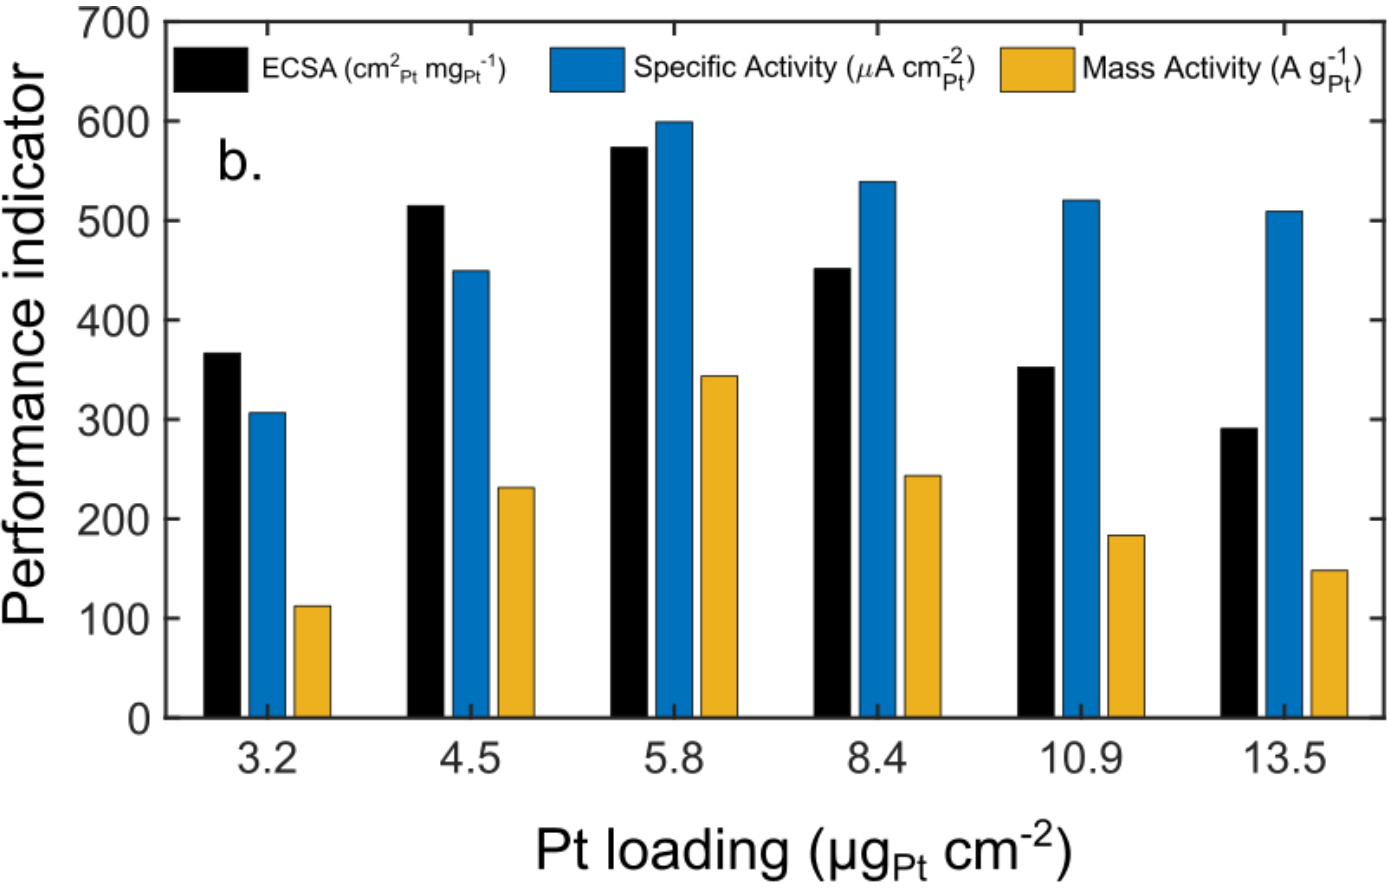

In [14]:
IPythonImage(filename=image_path, width=800)

In [15]:
print(r.json()["data"][0]['full'])

TITLE |  
 Pt loading (µg⋅ cm⋅) | ECSA (cm⋅, mg⋅) | Specific Activity (µA cm⋅) | Mass Activity (A 9pt) 
 3.2 | 368 | 308 | 114 
 4.5 | 515 | 450 | 235 
 5.8 | 575 | 600 | 345 
 8.4 | 455 | 541 | 245 
 10.9 | 354 | 522 | 184 
 13.5 | 293 | 511 | 150
